<a href="https://colab.research.google.com/github/ganjire/Python_Project/blob/main/Python_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [3]:
# load dataset creditcard.csv


df = pd.read_csv("./card_transdata.csv")

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# Dann den Dateipfad angeben
#import pandas as pd
#df = pd.read_csv('card_transdata.csv')



In [5]:
df.head()


,Identifier,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,anomaly
0,0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,1
1,1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,1
2,2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,1
3,3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,1
4,4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,1


In [6]:
df.tail()

,Identifier,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,anomaly
701066,701066,20.353099,6.289819,0.365139,1.0,0.0,0.0,0.0,0.0,1
701067,701067,14.760684,0.256367,0.165918,1.0,0.0,0.0,1.0,0.0,1
701068,701068,15.453180,0.251033,1.038109,1.0,0.0,0.0,0.0,0.0,1
701069,701069,2.131753,9.002525,1.428827,1.0,0.0,0.0,0.0,0.0,1
701070,701070,3.353519,0.089108,0.343640,1.0,1.0,0.0,1.0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701071 entries, 0 to 701070
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Identifier                      701071 non-null  int64  
 1   distance_from_home              701071 non-null  float64
 2   distance_from_last_transaction  701071 non-null  float64
 3   ratio_to_median_purchase_price  701071 non-null  float64
 4   repeat_retailer                 701071 non-null  float64
 5   used_chip                       701071 non-null  float64
 6   used_pin_number                 701071 non-null  float64
 7   online_order                    701071 non-null  float64
 8   fraud                           701071 non-null  float64
 9   anomaly                         701071 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 53.5 MB


In [8]:
df.describe().round(4)

,Identifier,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,anomaly
count,701071.0000,701071.0000,701071.0000,701071.0000,701071.0000,701071.0000,701071.0000,701071.0000,701071.0000,701071.000
mean,350535.0000,26.6471,5.0234,1.8247,0.8815,0.3501,0.1010,0.6506,0.0875,0.980
std,202381.9096,64.9958,26.4460,2.8033,0.3232,0.4770,0.3013,0.4768,0.2825,0.199
min,0.0000,0.0049,0.0001,0.0044,0.0000,0.0000,0.0000,0.0000,0.0000,-1.000
25%,175267.5000,3.8795,0.2958,0.4753,1.0000,0.0000,0.0000,0.0000,0.0000,1.000
50%,350535.0000,9.9725,0.9973,0.9976,1.0000,0.0000,0.0000,1.0000,0.0000,1.000
75%,525802.5000,25.7852,3.3515,2.0984,1.0000,1.0000,0.0000,1.0000,0.0000,1.000
max,701070.0000,10632.7237,11851.1046,267.8029,1.0000,1.0000,1.0000,1.0000,1.0000,1.000


In [9]:
# 1. Überprüfung auf Nullwerte
null_values = df.isnull().sum()
print("Null values in each column: " + null_values[null_values > 0].to_string())

# 2. Überprüfung auf nicht-numerische Werte
non_numeric = df.select_dtypes(exclude=['number']).columns
if len(non_numeric) > 0:
    print("\nNon-numeric columns: " + ', '.join(non_numeric))

# 3. Überprüfung auf Duplikate
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 4. Überprüfung auf ungewöhnliche Werte (z.B. negative Werte, falls nicht erlaubt)
negative_values = (df < 0).sum()
print("\nNegative values in each column (if any): " + negative_values[negative_values > 0].to_string())





Null values in each column: Series([], )

Number of duplicate rows: 0

Negative values in each column (if any): anomaly    7011


In [10]:
# Übersicht über die Datentypen und eindeutige Werte jedes Features

for column in df.columns:
    print(f"Feature: {column}")
    print(f"Type: {df[column].dtype}")
    print(f"Unique Values: {df[column].nunique()}")
    print(f"Sample of Unique Values: {df[column].unique()[:5]}")  # Nur die ersten 5 eindeutigen Werte als Beispiel
    print("-" * 40)


Feature: Identifier
Type: int64
Unique Values: 701071
Sample of Unique Values: [0 1 2 3 4]
----------------------------------------
Feature: distance_from_home
Type: float64
Unique Values: 701071
Sample of Unique Values: [57.87785658 10.8299427   5.09107949  2.24756433 44.190936  ]
----------------------------------------
Feature: distance_from_last_transaction
Type: float64
Unique Values: 701071
Sample of Unique Values: [0.31114001 0.1755915  0.80515259 5.60004355 0.56648627]
----------------------------------------
Feature: ratio_to_median_purchase_price
Type: float64
Unique Values: 701071
Sample of Unique Values: [1.94593998 1.29421881 0.42771456 0.36266258 2.2227673 ]
----------------------------------------
Feature: repeat_retailer
Type: float64
Unique Values: 2
Sample of Unique Values: [1. 0.]
----------------------------------------
Feature: used_chip
Type: float64
Unique Values: 2
Sample of Unique Values: [1. 0.]
----------------------------------------
Feature: used_pin_number

Distribution: fraud
0.0    639738
1.0     61333


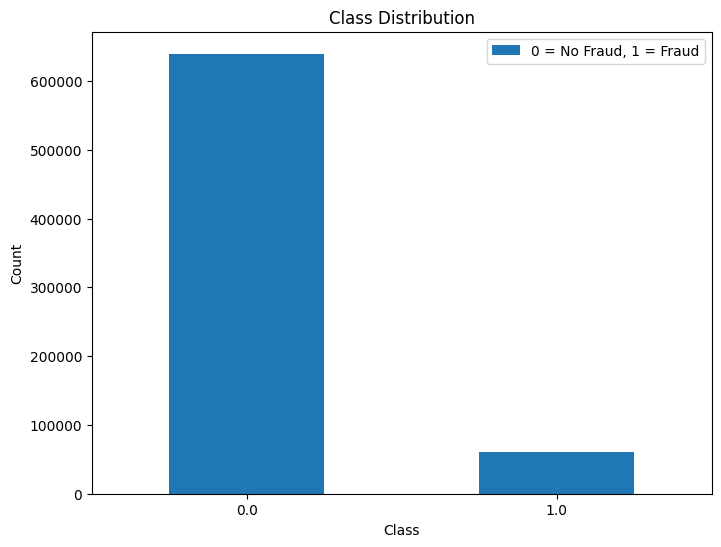

In [11]:
# class distribution (check if imbalanced)

class_counter = df["fraud"].value_counts()
print("Distribution: " + class_counter.to_string())

# Diagramm zur Visualisierung der Klassenverteilung

plt.figure(figsize=(8, 6))
class_counter.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['0 = No Fraud, 1 = Fraud'], loc='upper right')
plt.show()

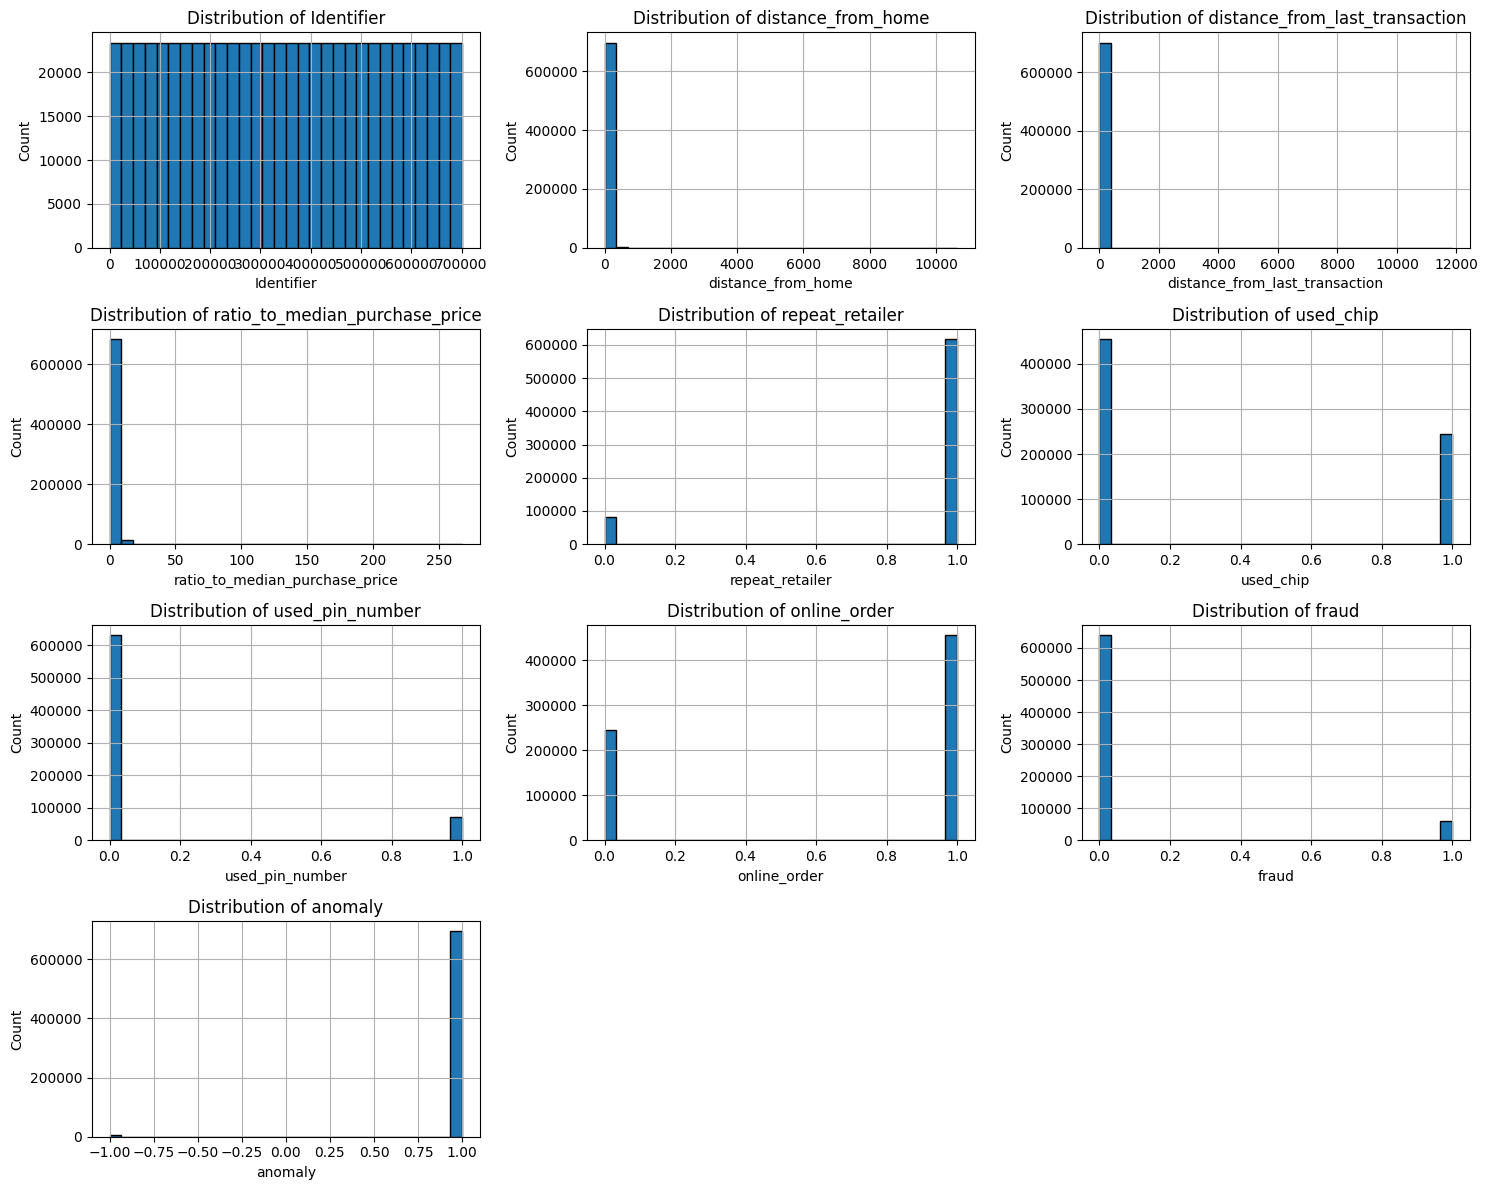

In [12]:
# Erstelle Histogramme für jede numerische Spalte im DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i)  # Automatische Anordnung der Plots
    df[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Correlation Matrix:
                                 Identifier  distance_from_home  \
Identifier                        1.000000           -0.000983   
distance_from_home               -0.000983            1.000000   
distance_from_last_transaction    0.000557            0.000502   
ratio_to_median_purchase_price    0.001730           -0.001823   
repeat_retailer                  -0.001241            0.144143   
used_chip                        -0.001779           -0.000804   
used_pin_number                  -0.002401           -0.000790   
online_order                     -0.002087           -0.001736   
fraud                             0.001850            0.187704   
anomaly                           0.006816           -0.086419   

                                distance_from_last_transaction  \
Identifier                                            0.000557   
distance_from_home                                    0.000502   
distance_from_last_transaction                        

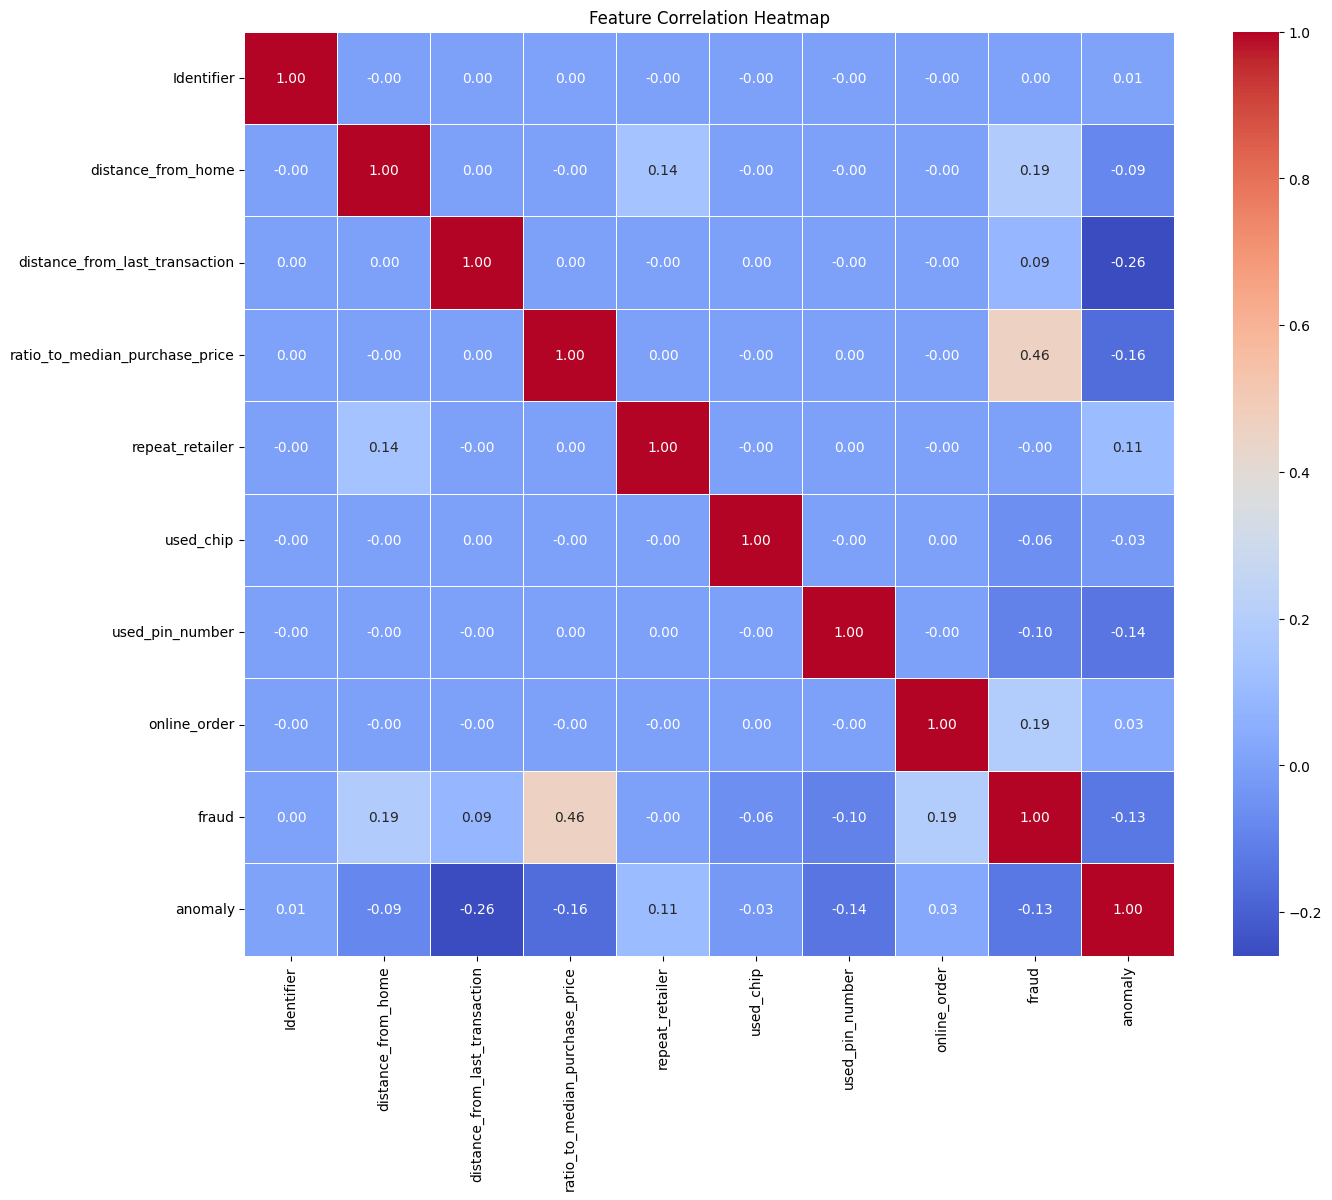

In [13]:
# Berechne die Korrelationsmatrix
correlation_matrix = df.corr()

# Ausgabe der Korrelationsmatrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualisiere die Korrelationsmatrix als Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


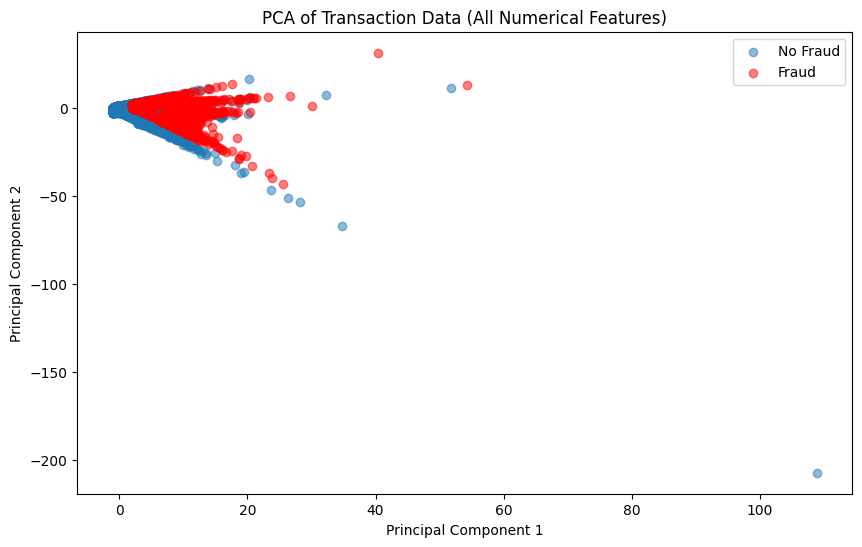

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Wähle alle numerischen Spalten für die PCA
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numerical_features]

# Standardisiere die Daten (wichtig für PCA)
x = StandardScaler().fit_transform(x)

# Führe PCA durch, mit mehr Komponenten, um die Gesamtvarianz besser zu erfassen
pca = PCA(n_components=2)  # Passe n_components ggf. an, um mehr Hauptkomponenten zu betrachten
principal_components = pca.fit_transform(x)

# Speichere die Ergebnisse in einem neuen DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['fraud'] = df['fraud']  # Füge das Ziel-Feature hinzu, um die Betrugsfälle zu markieren

# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['fraud'] == 0]['Principal Component 1'], pca_df[pca_df['fraud'] == 0]['Principal Component 2'], label='No Fraud', alpha=0.5)
plt.scatter(pca_df[pca_df['fraud'] == 1]['Principal Component 1'], pca_df[pca_df['fraud'] == 1]['Principal Component 2'], label='Fraud', alpha=0.5, color='red')
plt.title('PCA of Transaction Data (All Numerical Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


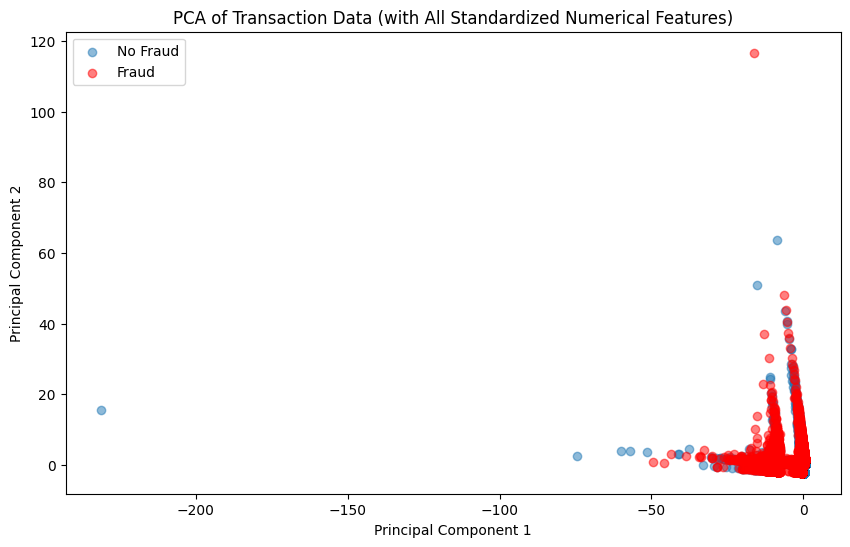

In [15]:
# PCA mit Daten-Skalierung

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Wähle alle numerischen Features (ohne das Ziel-Feature 'fraud')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
features = numerical_features.drop('fraud')  # Entferne das Ziel-Feature 'fraud' für die PCA

# Standardisiere die Daten
x = df[features]
x = StandardScaler().fit_transform(x)

# Führe PCA durch, hier mit 2 Komponenten für die Visualisierung
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Speichere die Ergebnisse in einem neuen DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['fraud'] = df['fraud']  # Füge das Ziel-Feature hinzu, um die Betrugsfälle zu markieren

# Visualisierung der PCA-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['fraud'] == 0]['Principal Component 1'], pca_df[pca_df['fraud'] == 0]['Principal Component 2'], label='No Fraud', alpha=0.5)
plt.scatter(pca_df[pca_df['fraud'] == 1]['Principal Component 1'], pca_df[pca_df['fraud'] == 1]['Principal Component 2'], label='Fraud', alpha=0.5, color='red')
plt.title('PCA of Transaction Data (with All Standardized Numerical Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



Anzahl der Anomalien: 7011


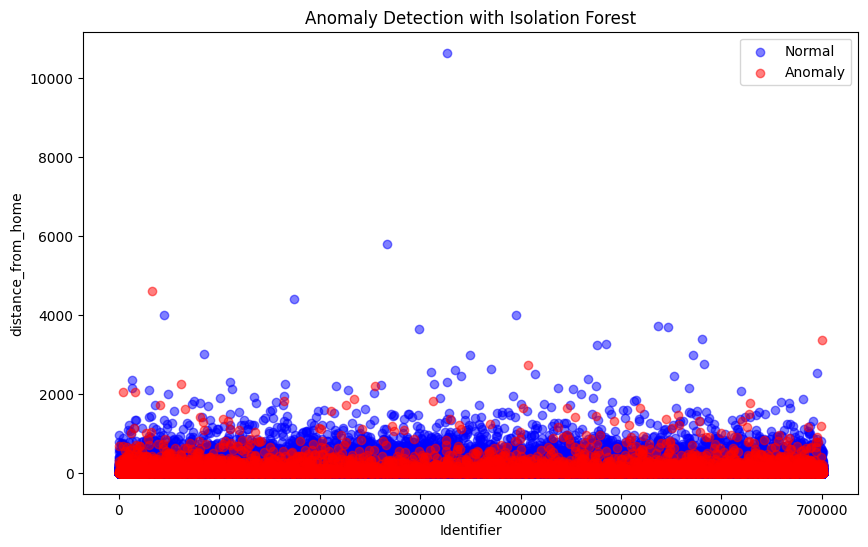

In [16]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Wähle numerische Features für die Anomalieerkennung
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
x = df[numerical_features]

# Isolation Forest Modell erstellen und anpassen
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% der Daten als Anomalien betrachten
df['anomaly'] = iso_forest.fit_predict(x)

# -1 zeigt Anomalien an, 1 zeigt normale Daten an
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Anzahl der Anomalien ausgeben
print(f"Anzahl der Anomalien: {len(anomalies)}")

# Visualisierung der Anomalien in Bezug auf die ersten beiden Merkmale (für eine einfache Übersicht)
plt.figure(figsize=(10, 6))
plt.scatter(normal[numerical_features[0]], normal[numerical_features[1]], label='Normal', alpha=0.5, c='blue')
plt.scatter(anomalies[numerical_features[0]], anomalies[numerical_features[1]], label='Anomaly', alpha=0.5, c='red')
plt.xlabel(numerical_features[0])
plt.ylabel(numerical_features[1])
plt.legend()
plt.title('Anomaly Detection with Isolation Forest')
plt.show()


In [17]:
import pandas as pd
import numpy as np


# Liste numerischer Spalten auswählen
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Z-Score Methode
z_score_threshold = 3
z_scores = np.abs((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std())
outliers_z_score = (z_scores > z_score_threshold)

# IQR Methode
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Zähle die Ausreißer pro Spalte für jede Methode
outlier_summary = pd.DataFrame({
    'Z-Score Outliers': outliers_z_score.sum(),
    'IQR Outliers': outliers_iqr.sum()
})

# Ausgabe der Ergebnisse
print("Anzahl der Ausreißer pro Spalte für beide Methoden:")
print(outlier_summary)


Anzahl der Ausreißer pro Spalte für beide Methoden:
                                Z-Score Outliers  IQR Outliers
Identifier                                     0             0
distance_from_home                          9448         72653
distance_from_last_transaction              4798         87221
ratio_to_median_purchase_price             11917         59150
repeat_retailer                                0         83093
used_chip                                      0             0
used_pin_number                                0         70795
online_order                                   0             0
fraud                                      61333         61333


# **Unifying & Transformation**

In [18]:
for col_label, col in df.items():
    print(col_label, col, sep='\n', end='\n\n')


Identifier
0              0
1              1
2              2
3              3
4              4
           ...  
701066    701066
701067    701067
701068    701068
701069    701069
701070    701070
Name: Identifier, Length: 701071, dtype: int64

distance_from_home
0         57.877857
1         10.829943
2          5.091079
3          2.247564
4         44.190936
            ...    
701066    20.353099
701067    14.760684
701068    15.453180
701069     2.131753
701070     3.353519
Name: distance_from_home, Length: 701071, dtype: float64

distance_from_last_transaction
0         0.311140
1         0.175592
2         0.805153
3         5.600044
4         0.566486
            ...   
701066    6.289819
701067    0.256367
701068    0.251033
701069    9.002525
701070    0.089108
Name: distance_from_last_transaction, Length: 701071, dtype: float64

ratio_to_median_purchase_price
0         1.945940
1         1.294219
2         0.427715
3         0.362663
4         2.222767
            ...   
70

## Time Series nicht möglich da keine Zeitspalte vorhanden -> "Für ein Modell zur Betrugserkennung ist eine künstliche Zeitreihe normalerweise nicht optimal, da sie die echten zeitlichen Muster in den Daten nicht widerspiegelt. Eine echte Zeitreihe mit tatsächlichen Transaktionszeiten kann für die Erkennung von Betrug wichtige zeitliche Muster enthalten (z. B. ungewöhnlich häufige Transaktionen innerhalb kurzer Zeit)"

In [19]:
# Grundlegende Transformationen und Vereinheitlichungen

# Konvertierung von Zeitstempeln
# Wenn 'transaction_time' eine Zeitspalte ist

#if 'transaction_time' in df.columns:
   # df['transaction_time'] = pd.to_datetime(df['transaction_time'])
   # df.set_index('transaction_time', inplace=True)

In [20]:
# Verwendung von .itertuples() zur Iteration über Zeilen als benannte Tupel (Beispiel)
# Wir verwenden hier die vorhandenen Spalten 'distance_from_home' und 'distance_from_last_transaction'
# als Beispiel, um eine ähnliche Struktur zu haben wie in dem Dozenten-Notebook.

print("\nIteration mit .itertuples() (Begrenzte Vorschau):")
for row in df[['distance_from_home', 'distance_from_last_transaction']].itertuples():
    print(row)
    if row.Index >= 4:  # Nach 5 Zeilen abbrechen (Index 0 bis 4)
        break



Iteration mit .itertuples() (Begrenzte Vorschau):
Pandas(Index=0, distance_from_home=57.87785658389723, distance_from_last_transaction=0.3111400080477545)
Pandas(Index=1, distance_from_home=10.829942699255543, distance_from_last_transaction=0.1755915022816658)
Pandas(Index=2, distance_from_home=5.091079490616996, distance_from_last_transaction=0.8051525945853258)
Pandas(Index=3, distance_from_home=2.2475643282963613, distance_from_last_transaction=5.60004354707232)
Pandas(Index=4, distance_from_home=44.19093600261837, distance_from_last_transaction=0.5664862680583477)


In [21]:
# Erstellen von Listen aus spezifischen Daten im DataFrame
# Beispiel: Extrahieren der Werte für 'distance_from_home' und 'fraud' in separaten Listen
if 'distance_from_home' in df.columns and 'fraud' in df.columns:
    distance_values = df['distance_from_home'].tolist()
    fraud_labels = df['fraud'].tolist()
    print("\nBeispiel-Distanzwerte:", distance_values[:5])
    print("Beispiel-Betrugsklassifikationen:", fraud_labels[:5])



Beispiel-Distanzwerte: [57.87785658389723, 10.829942699255543, 5.091079490616996, 2.2475643282963613, 44.19093600261837]
Beispiel-Betrugsklassifikationen: [0.0, 0.0, 0.0, 0.0, 0.0]


In [22]:
# Iteration über DataFrame-Spalten und -Zeilen

# Spalten iterieren und ausgeben
print("\nIteration über die Spalten:")
for col_label, col in df.items():
    print(f"Spalte: {col_label}")
    print(f"Daten:\n{col.head()}")
    print('-' * 40)

# Zeilen iterieren und ausgeben (nur die ersten 5 Zeilen zur Übersicht)
print("\nIteration über die ersten 5 Zeilen:")
for row_label, row in df.head(5).iterrows():
    print(f"Zeile: {row_label}")
    print(f"Daten:\n{row}")
    print('-' * 40)


Iteration über die Spalten:
Spalte: Identifier
Daten:
0    0
1    1
2    2
3    3
4    4
Name: Identifier, dtype: int64
----------------------------------------
Spalte: distance_from_home
Daten:
0    57.877857
1    10.829943
2     5.091079
3     2.247564
4    44.190936
Name: distance_from_home, dtype: float64
----------------------------------------
Spalte: distance_from_last_transaction
Daten:
0    0.311140
1    0.175592
2    0.805153
3    5.600044
4    0.566486
Name: distance_from_last_transaction, dtype: float64
----------------------------------------
Spalte: ratio_to_median_purchase_price
Daten:
0    1.945940
1    1.294219
2    0.427715
3    0.362663
4    2.222767
Name: ratio_to_median_purchase_price, dtype: float64
----------------------------------------
Spalte: repeat_retailer
Daten:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: repeat_retailer, dtype: float64
----------------------------------------
Spalte: used_chip
Daten:
0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Na

# Data Cleansing

- Dropping Columns in a Data Frame: macht keinen Sinn, da die CSV-Datei bereits die wichtigsten Infos enthält 
- Changing the Index of a DataFrame: in der Orginal-Datei gibt es keine Spalte als Identifier, dies wurde als erste Spalte in CSV-Datei hinzugefügt 
- Tidying up Fields in the Data: aktuell scheinen alle Datenformate brauchbar für Maschine Learning zu sein. Es gibt keine Jahreszahlen in der CSV-Datei. 
- Interlude: Introduction to Regular Expressions (Regex) in Python: die CSV-Datei hat nur float64 Objekte, daher macht Regex hier keinen Sinn. 
- applymap(): unnötig, da die CSV Datei nur elemente mit datentyp float hat und dies z.b. keine Leerzeichen zulässt. Fehlende Elemente wurden bereits bereinigt 



In [23]:
print(df.head)


<bound method NDFrame.head of         Identifier  distance_from_home  distance_from_last_transaction  \
0                0           57.877857                        0.311140   
1                1           10.829943                        0.175592   
2                2            5.091079                        0.805153   
3                3            2.247564                        5.600044   
4                4           44.190936                        0.566486   
...            ...                 ...                             ...   
701066      701066           20.353099                        6.289819   
701067      701067           14.760684                        0.256367   
701068      701068           15.453180                        0.251033   
701069      701069            2.131753                        9.002525   
701070      701070            3.353519                        0.089108   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0          

In [24]:
# Identifier-Spalte hinzufügen
df['Identifier'] = range(len(df))

# Identifier-Spalte als erste Spalte setzen
df = df.set_index('Identifier')

# CSV-Datei mit der geänderten Struktur speichern
df.to_csv('card_transdata.csv')



In [25]:
df.index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       701061, 701062, 701063, 701064, 701065, 701066, 701067, 701068, 701069,
       701070],
      dtype='int64', name='Identifier', length=701071)

In [26]:
# Testen, ob der Identifier korrekt implementiert wurde 
df.loc[206]

distance_from_home                3.250049
distance_from_last_transaction    1.261073
ratio_to_median_purchase_price    0.508139
repeat_retailer                   1.000000
used_chip                         1.000000
used_pin_number                   0.000000
online_order                      0.000000
fraud                             0.000000
anomaly                           1.000000
Name: 206, dtype: float64

In [27]:
# Überprüfen, welche Data Types das CSV hat

df.dtypes


distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
anomaly                             int32
dtype: object

In [28]:
# Alle Spalten finden, in denen alle Daten vorhanden sind
complete_columns = list(df.columns)
complete_columns

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order',
 'fraud',
 'anomaly']

In [29]:
# Überprüfen von NaN Werte
print(df.isnull().any())

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
anomaly                           False
dtype: bool


In [30]:
# count NaN values in each column
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
anomaly                           0
dtype: int64


In [31]:
print(df[df.isnull().any(axis=1)])


Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud, anomaly]
Index: []


In [32]:
print(df.index)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       701061, 701062, 701063, 701064, 701065, 701066, 701067, 701068, 701069,
       701070],
      dtype='int64', name='Identifier', length=701071)


In [33]:
# Überprüfen, ob 701071 im Index vorhanden ist
if 701071 in df.index:
    # Zeile entfernen, wenn sie existiert
    df = df.drop(701071, axis='index')
    print("Zeile 701071 wurde entfernt.")
else:
    print("Index 701071 existiert nicht im DataFrame.")

Index 701071 existiert nicht im DataFrame.


In [34]:
# count NaN values in each column
print(df.isnull().sum())

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
anomaly                           0
dtype: int64


In [35]:
df['distance_from_home'].head(10)

Identifier
0    57.877857
1    10.829943
2     5.091079
3     2.247564
4    44.190936
5     5.586408
6     3.724019
7     4.848247
8     0.876632
9     8.839047
Name: distance_from_home, dtype: float64

In [36]:
# Anzahl doppelte Zeilen prüfen und entfernen 
print(f"Anzahl doppelter Zeilen: {df.duplicated().sum()}")
df = df.drop_duplicates()

Anzahl doppelter Zeilen: 0


In [37]:
# Abspeicherung der Änderung 
df.to_csv('card_transdata.csv', index=True)

# Analysis & Validation 

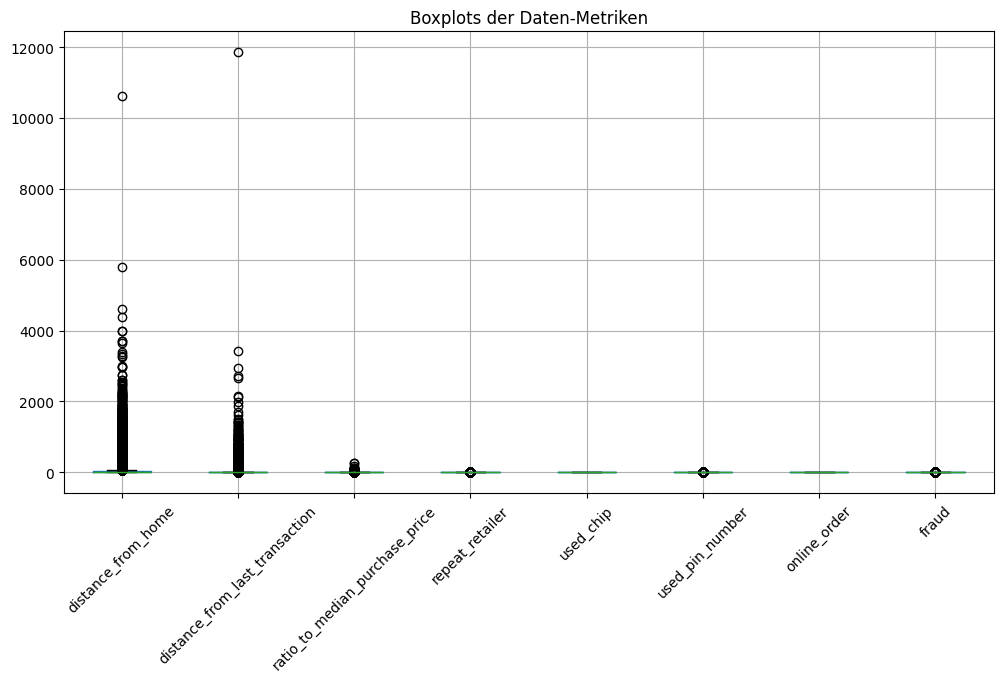

In [38]:
# Erstellung von Boxplots zur Überprüfung von Ausreissern
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['float64']).boxplot()  
plt.xticks(rotation=45)
plt.title('Boxplots der Daten-Metriken')
plt.show()

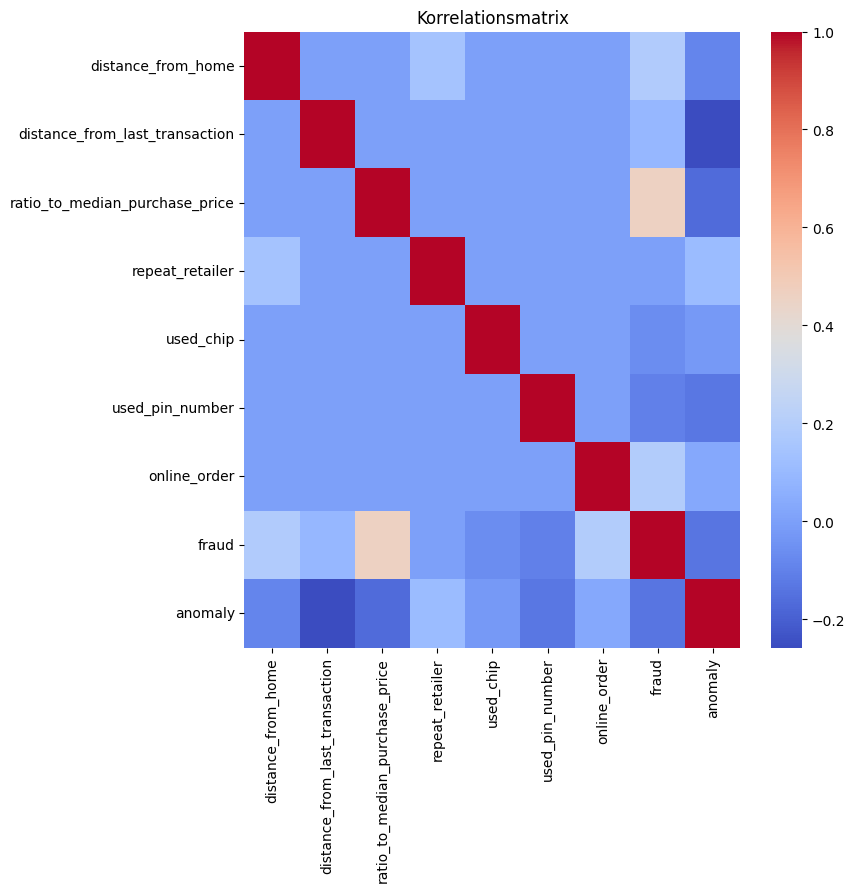

In [45]:
# Korrelationsmatrix erstellen 

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()

In [39]:
# Die drei Typen der Korrelation anwenden 
from scipy import stats

# Funktion für die Berechnung der Korrelationen 
def print_correlations(x, y, title):
    pearson_r, _ = stats.pearsonr(x, y)
    spearman_rho, _ = stats.spearmanr(x, y)
    kendall_tau, _ = stats.kendalltau(x, y)

    print(f"Korrelation für: {title}:")
    print(f"Pearson (r)   = {pearson_r:.3f}")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")
    print(f"Kendall (τ)   = {kendall_tau:.3f}")

# Zielvariable definieren
target = 'fraud'

# Nur nummerische Spalten auswählen 
numeric_columns = df.select_dtypes(include=['float64']).columns

# Berechnen Korrelation zwischen Fraud und allen anderen nummerischen Spalten 
for col in numeric_columns:
    if col != target:  # Zielvariable nicht mit sich selbst vergleichen
        print_correlations(df[target], df[col], f"{target} vs {col}")

Korrelation für: fraud vs distance_from_home:
Pearson (r)   = 0.188
Spearman (ρ)  = 0.095
Kendall (τ)   = 0.078
Korrelation für: fraud vs distance_from_last_transaction:
Pearson (r)   = 0.088
Spearman (ρ)  = 0.034
Kendall (τ)   = 0.028
Korrelation für: fraud vs ratio_to_median_purchase_price:
Pearson (r)   = 0.461
Spearman (ρ)  = 0.343
Kendall (τ)   = 0.280
Korrelation für: fraud vs repeat_retailer:
Pearson (r)   = -0.001
Spearman (ρ)  = -0.001
Kendall (τ)   = -0.001
Korrelation für: fraud vs used_chip:
Pearson (r)   = -0.062
Spearman (ρ)  = -0.062
Kendall (τ)   = -0.062
Korrelation für: fraud vs used_pin_number:
Pearson (r)   = -0.101
Spearman (ρ)  = -0.101
Kendall (τ)   = -0.101
Korrelation für: fraud vs online_order:
Pearson (r)   = 0.192
Spearman (ρ)  = 0.192
Kendall (τ)   = 0.192


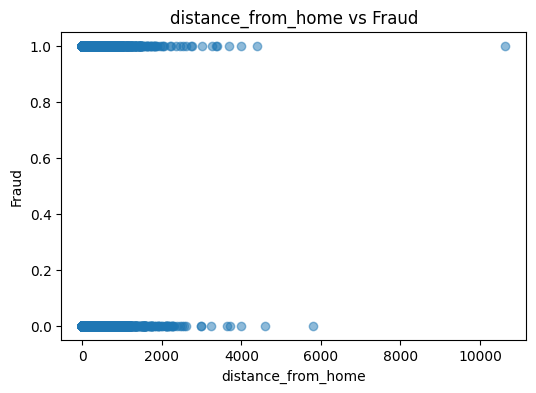

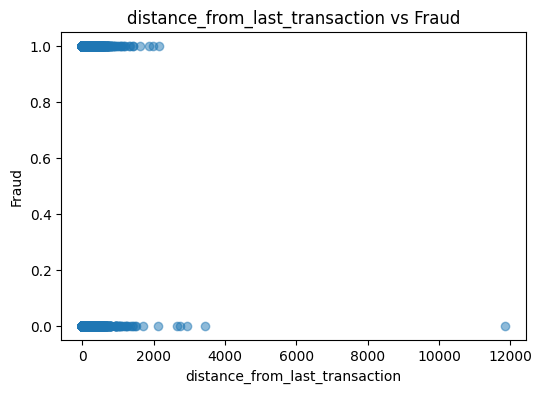

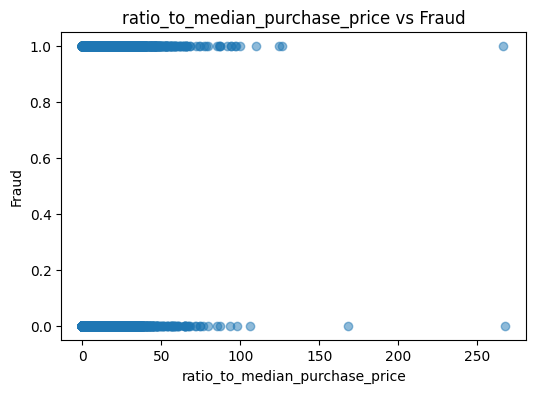

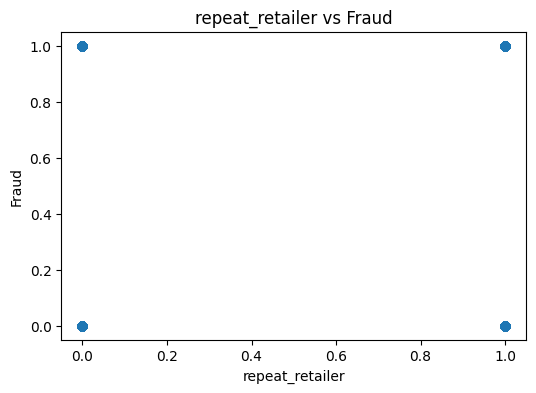

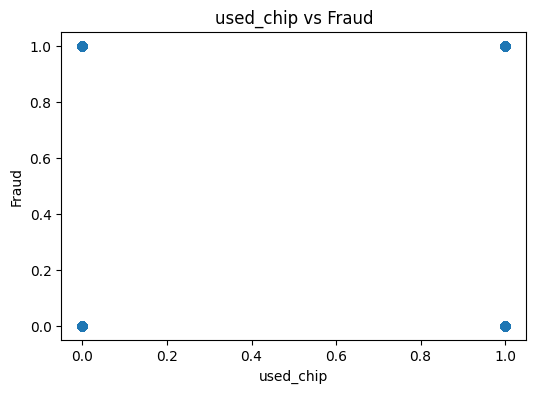

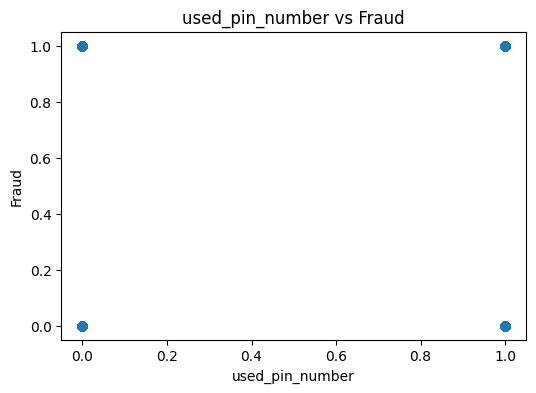

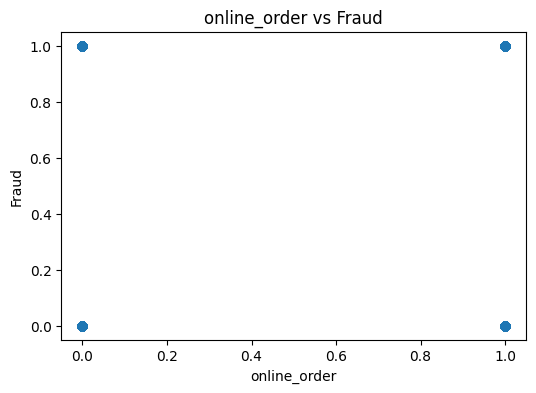

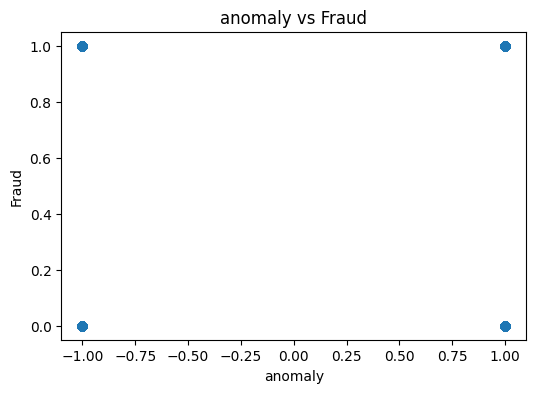

In [40]:
# Bestimmung Linerae Beziehung zwischen Fraud und andere Variablen 
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'fraud':
        plt.figure(figsize=(6, 4))
        plt.scatter(df[column], df['fraud'], alpha=0.5)
        plt.title(f'{column} vs Fraud')
        plt.xlabel(column)
        plt.ylabel('Fraud')
        plt.show()

In [44]:
from scipy import stats

# Funktion für die Berechnung der Spearman-Korrelation
def correlation_analysis_spearman(x, y, title):
    spearman_rho, _ = stats.spearmanr(x, y)
    print(f"Korrelation für: {title}:")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")
    print("-" * 40)

# Zielvariable definieren
target = 'fraud'

# Nur numerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64']).columns

# Berechnen der Spearman-Korrelationen zwischen Fraud und allen anderen numerischen Spalten
for col in numeric_columns:
    if col != target:  
        correlation_analysis_spearman(df[target], df[col], f"{target} vs {col}")


Korrelation für: fraud vs distance_from_home:
Spearman (ρ)  = 0.095
----------------------------------------
Korrelation für: fraud vs distance_from_last_transaction:
Spearman (ρ)  = 0.034
----------------------------------------
Korrelation für: fraud vs ratio_to_median_purchase_price:
Spearman (ρ)  = 0.343
----------------------------------------
Korrelation für: fraud vs repeat_retailer:
Spearman (ρ)  = -0.001
----------------------------------------
Korrelation für: fraud vs used_chip:
Spearman (ρ)  = -0.062
----------------------------------------
Korrelation für: fraud vs used_pin_number:
Spearman (ρ)  = -0.101
----------------------------------------
Korrelation für: fraud vs online_order:
Spearman (ρ)  = 0.192
----------------------------------------


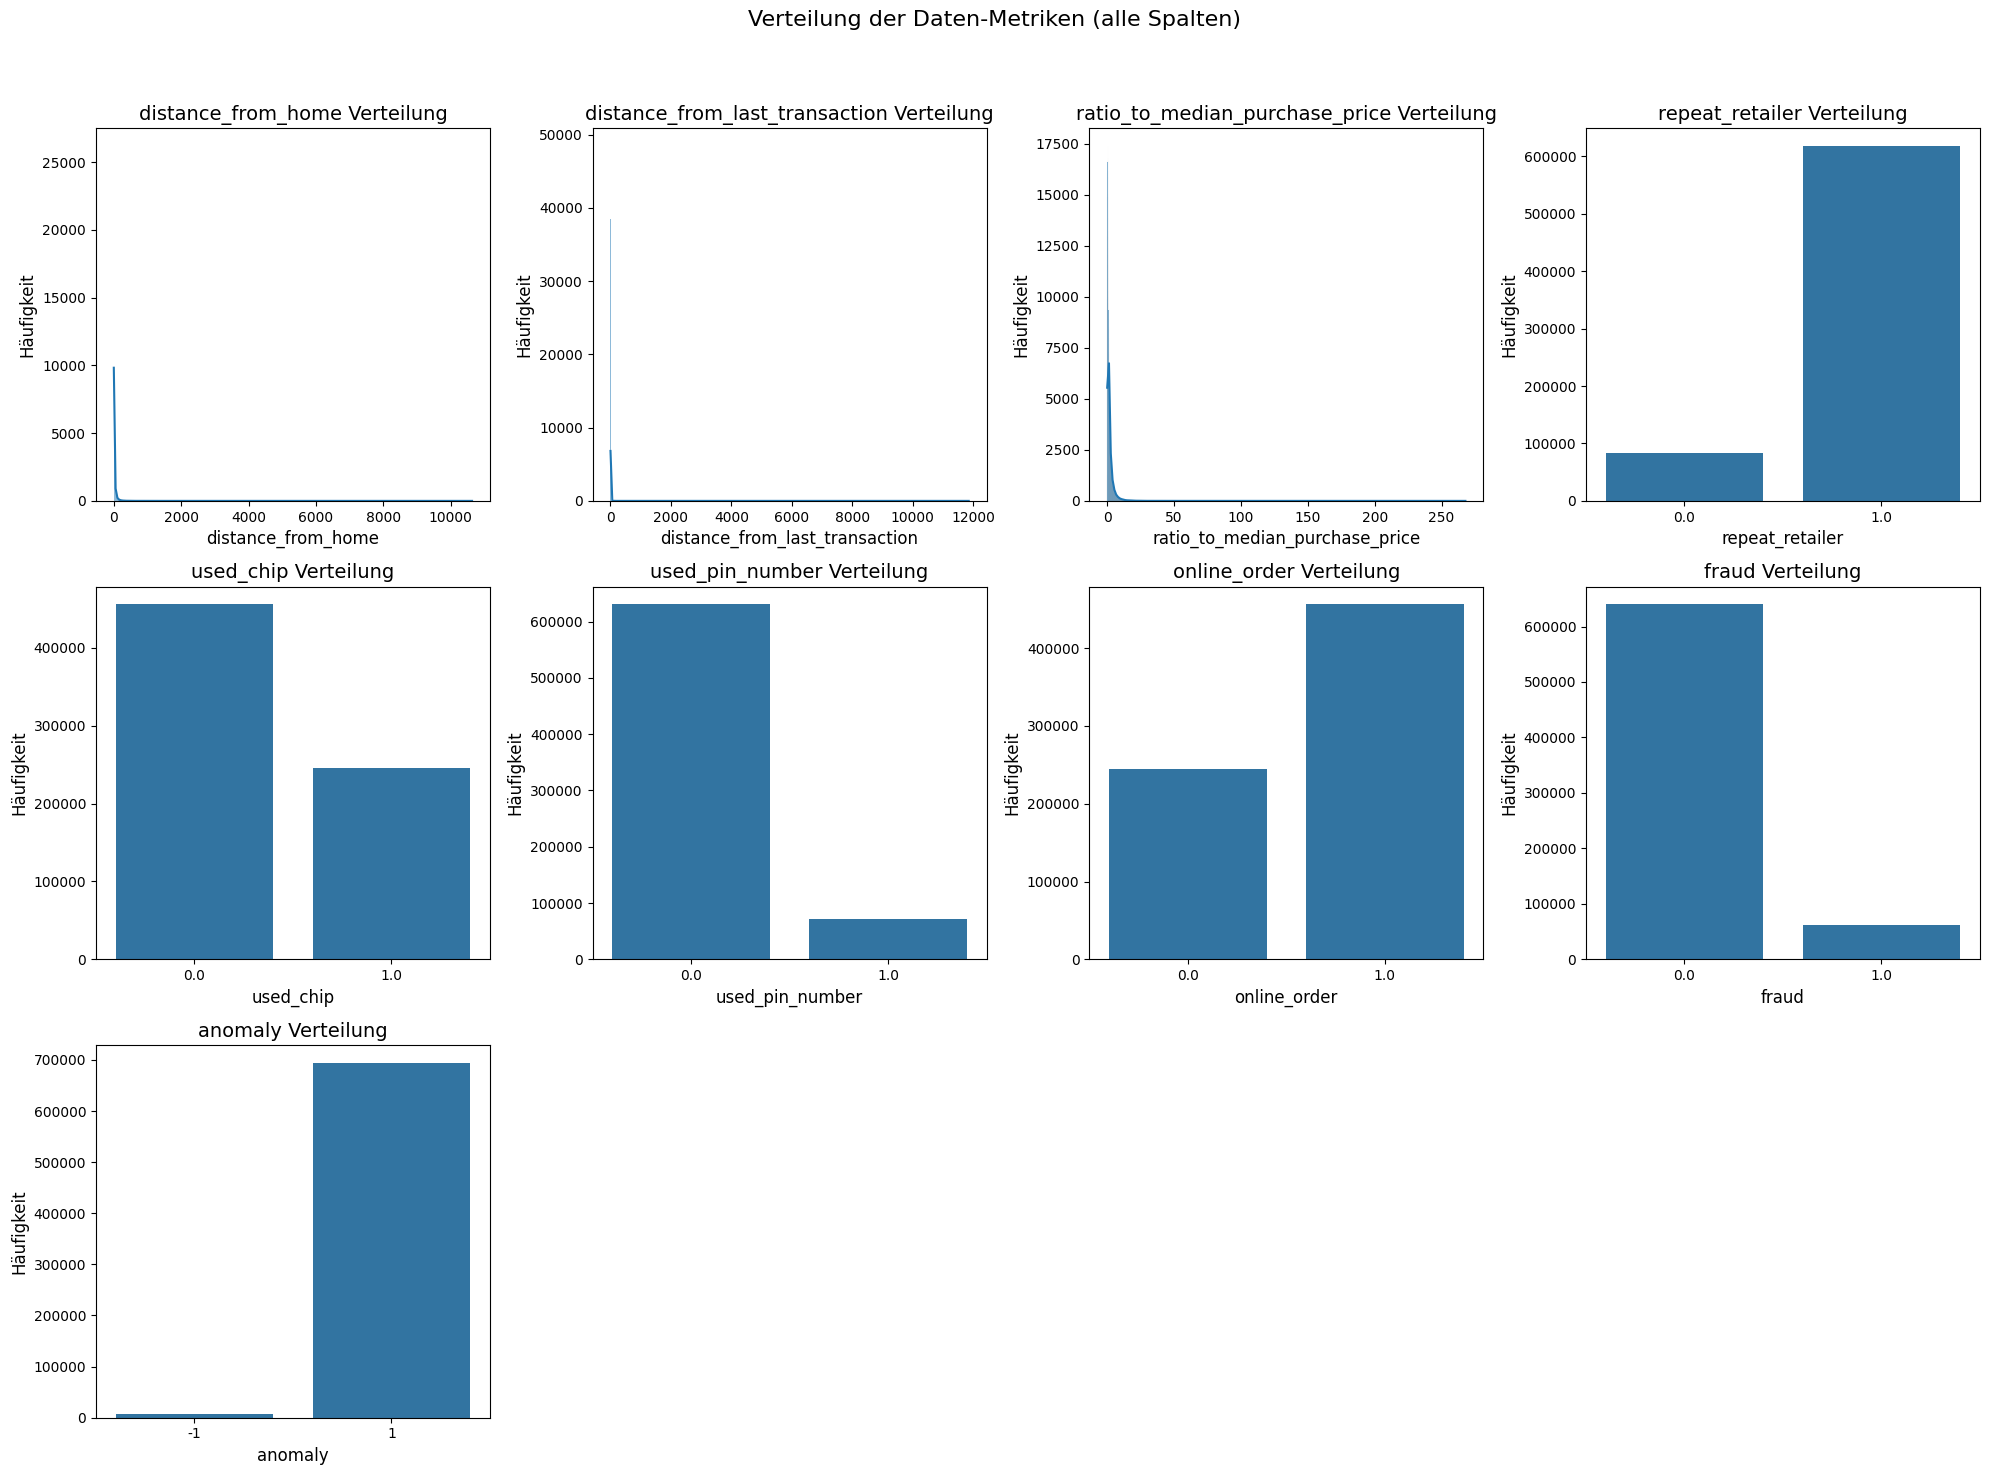

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl aller Spalten aus dem Datensatz
selected_columns = df.columns

# Erstellung eines Subplots mit einer geeigneten Anzahl von Zeilen und Spalten
n_cols = 4  # Anzahl der Diagramme pro Zeile
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Berechnung der Zeilenanzahl

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Verteilung der Daten-Metriken (alle Spalten)', fontsize=16)

# Umwandlung der Achsen in eine flache Liste
axes = axes.flatten()

# Erstelle ein Verteilungsdiagramm für jede Spalte
for idx, column in enumerate(selected_columns):
    # Verwende einen anderen Plot-Typ für binäre Variablen
    if df[column].nunique() <= 2:  # Binäre Spalten
        sns.countplot(data=df, x=column, ax=axes[idx])
    else:  # Numerische Spalten
        sns.histplot(data=df, x=column, ax=axes[idx], kde=True)
    
    # Setze Titel und Achsenbeschriftungen
    axes[idx].set_title(f'{column} Verteilung', fontsize=14)
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_ylabel('Häufigkeit', fontsize=12)

# Entferne nicht genutzte Subplot-Felder, falls Spaltenanzahl nicht exakt passt
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Anpassung des Layouts, um Überlappungen zu vermeiden
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Identifizierter Estimand:
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                                                                           d  
──────────────────────────────────────────────────────────────────────────────
d[distance_from_home  distance_from_last_transaction  ratio_to_median_purchase

                                                                              
──────────────────────────────────────────────────────────────────────────(E[f
_price  repeatᵣₑₜₐᵢₗₑᵣ  used_chip  used_pin_number  online_order  anomaly]    

      
raud])
      
Estimand assumption 1, Unconfoundedness: If U→{distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,anomaly} and U→fraud then P(fraud|distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,u

c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Kausale Wirkung (Causal Effect): -0.053818513893198285
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}


c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Placebo-Test zur Validierung der Kausalwirkung:
Refute: Use a Placebo Treatment
Estimated effect:-0.053818513893198285
New effect:0.0
p value:2.0



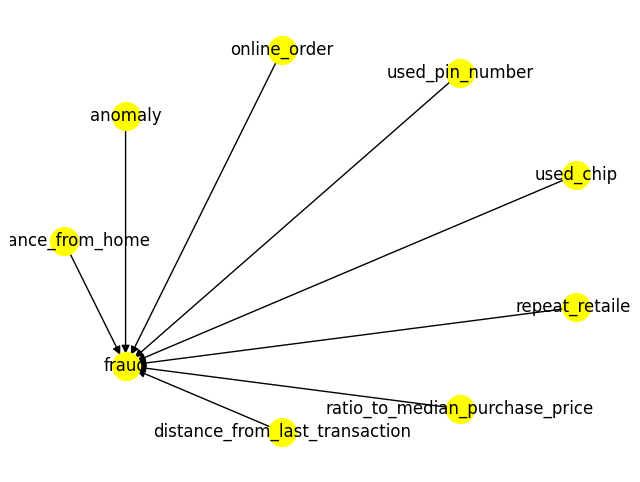

In [46]:
# Kausalität anschauen 
%pip install dowhy

import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd
import networkx as nx


# Alle Spalten außer der Zielvariable als Behandlungsvariablen definieren
outcome_var = "fraud"
treatment_vars = [col for col in df.columns if col != outcome_var]

# Definition des kausalen Modells
model = CausalModel(
    data=df,
    treatment=treatment_vars,  # Behandlungsvariablen (Treatments)
    outcome=outcome_var,       # Zielvariable
    graph=f"""
        digraph {{
            {'; '.join([f'{treatment} -> {outcome_var}' for treatment in treatment_vars])};
        }}
    """
)

# Visualisierung des Kausalgraphen
model.view_model()

# Identifizieren der Kausalwirkung
identified_estimand = model.identify_effect()
print("Identifizierter Estimand:")
print(identified_estimand)

# Schätzung der Kausalwirkung
causal_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Ergebnisse der Kausalanalyse anzeigen
print("Kausale Wirkung (Causal Effect):", causal_effect.value)

# Validierung der Ergebnisse mit einem Placebo-Test
refutation = model.refute_estimate(
    identified_estimand,
    causal_effect,
    method_name="placebo_treatment_refuter"
)
print("Placebo-Test zur Validierung der Kausalwirkung:")
print(refutation)



## Key Findings: 
- Korrelation: stärkste Korrelation mit Fraud hat ratio_to_median_purchase_price (p=0.343). Online_Order und used_pin_number haben mit Fraud eine schwächeren Zusammenhand. Distance_from_home, distance_from_last_transaction, repeat_retailer, und used_chip haben entweder sehr schwache oder keine Korrelation mit Betrug.
- Outliers: Distance_from_home und distance_from_last_transaction ratio_to_median_purchase_price enthalten Ausreisser, die auf interessante Muster hinweisen könnten. 
- Kausalität: zwischen erklährenden Variablen und Fraud ist Kausalität vorhanden 